In [ ]:
%load_ext autoreload
%autoreload 2

import scanpy as sc
import yaml
import json
import os
import sys
sys.path.append('../')
sys.path.append('../hovernet')
sys.path.append('../hedest')

PATH = '/home/luca/Documents/data/'
# '/cluster/CBIO/data1/lgortana/'
# '/home/luca/Documents/data_CBIO/'
# '/home/luca/Documents/data/'

/home/luca/anaconda3/envs/plugin-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data information

In [2]:
import torch

#load adata
adata_name = 'CytAssist_11mm_FFPE_Human_Ovarian_Carcinoma'
data_path = os.path.join(PATH, adata_name)

#image path
image_path = os.path.join(data_path, f'tif/{adata_name}_tissue_image.tif')
image_dict = torch.load(os.path.join(data_path, "image_dict_64.pt"))

/home/luca/anaconda3/envs/plugin-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/luca/anaconda3/envs/plugin-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
import pandas as pd

#load spot proportions
spot_prop_df = pd.read_csv(os.path.join(data_path, f'sim/4clusters_500spots_balanced_prop.csv'), index_col=0)
spot_prop_df.index = spot_prop_df.index.astype(str)
ct_list = list(spot_prop_df.columns)

#load spot dict
with open(os.path.join(data_path, f'sim/4clusters_500spots_balanced_spot_dict.json'), "r") as file:
    spot_dict = json.load(file)

#load ground truth (clusters)
ground_truth = pd.read_csv(os.path.join(data_path, f'sim/4clusters_500spots_balanced_gt.csv'), index_col=0)
ground_truth.index = ground_truth.index.astype(str)

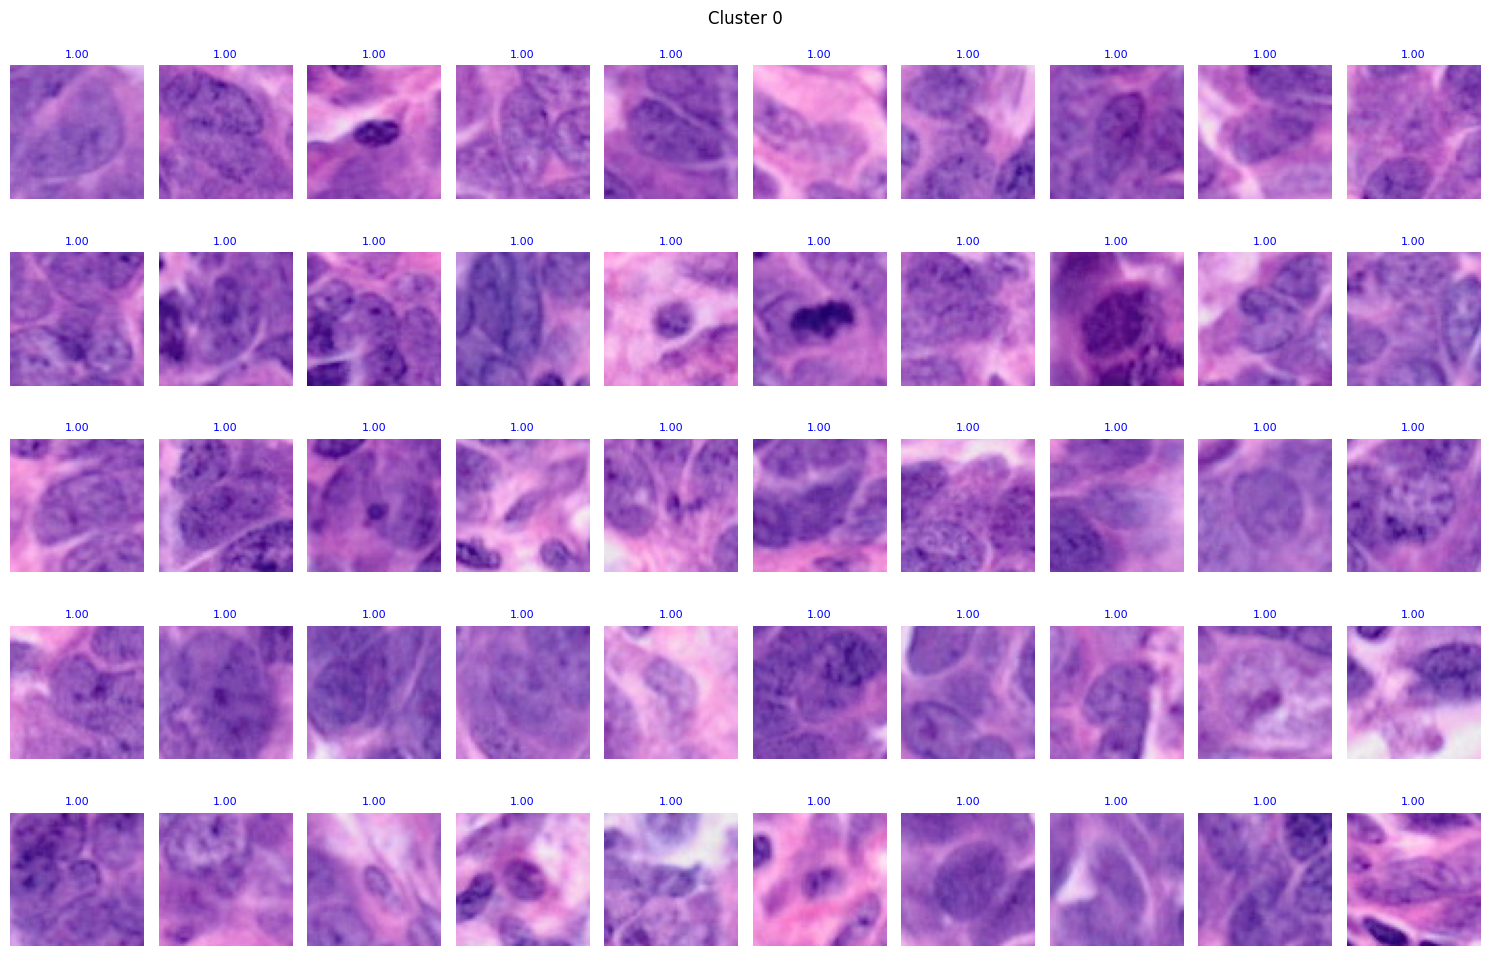

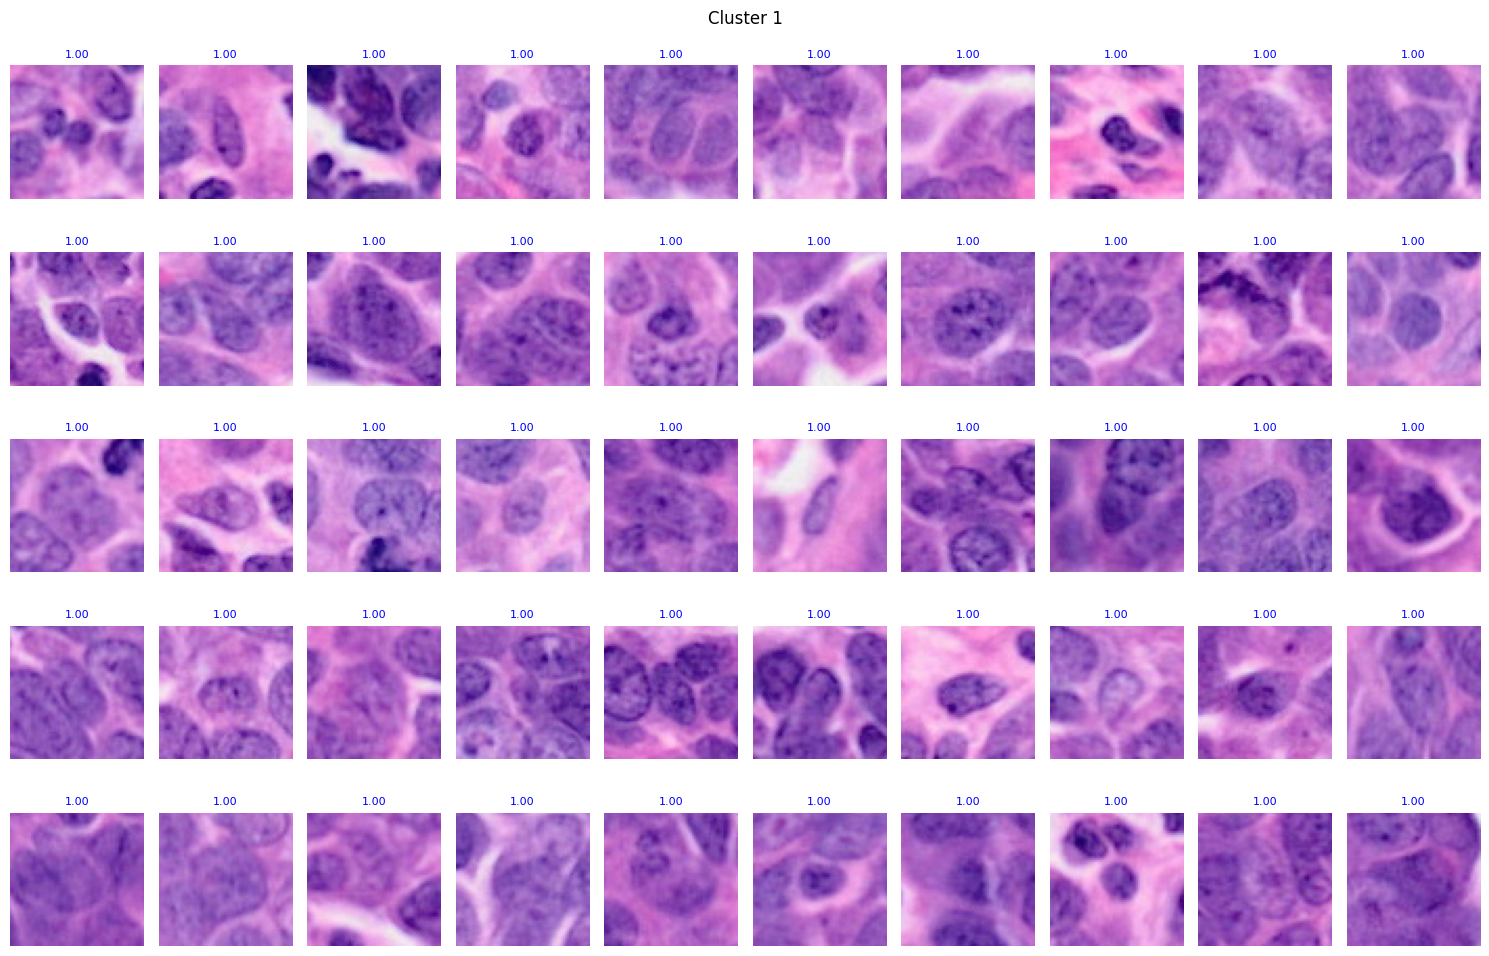

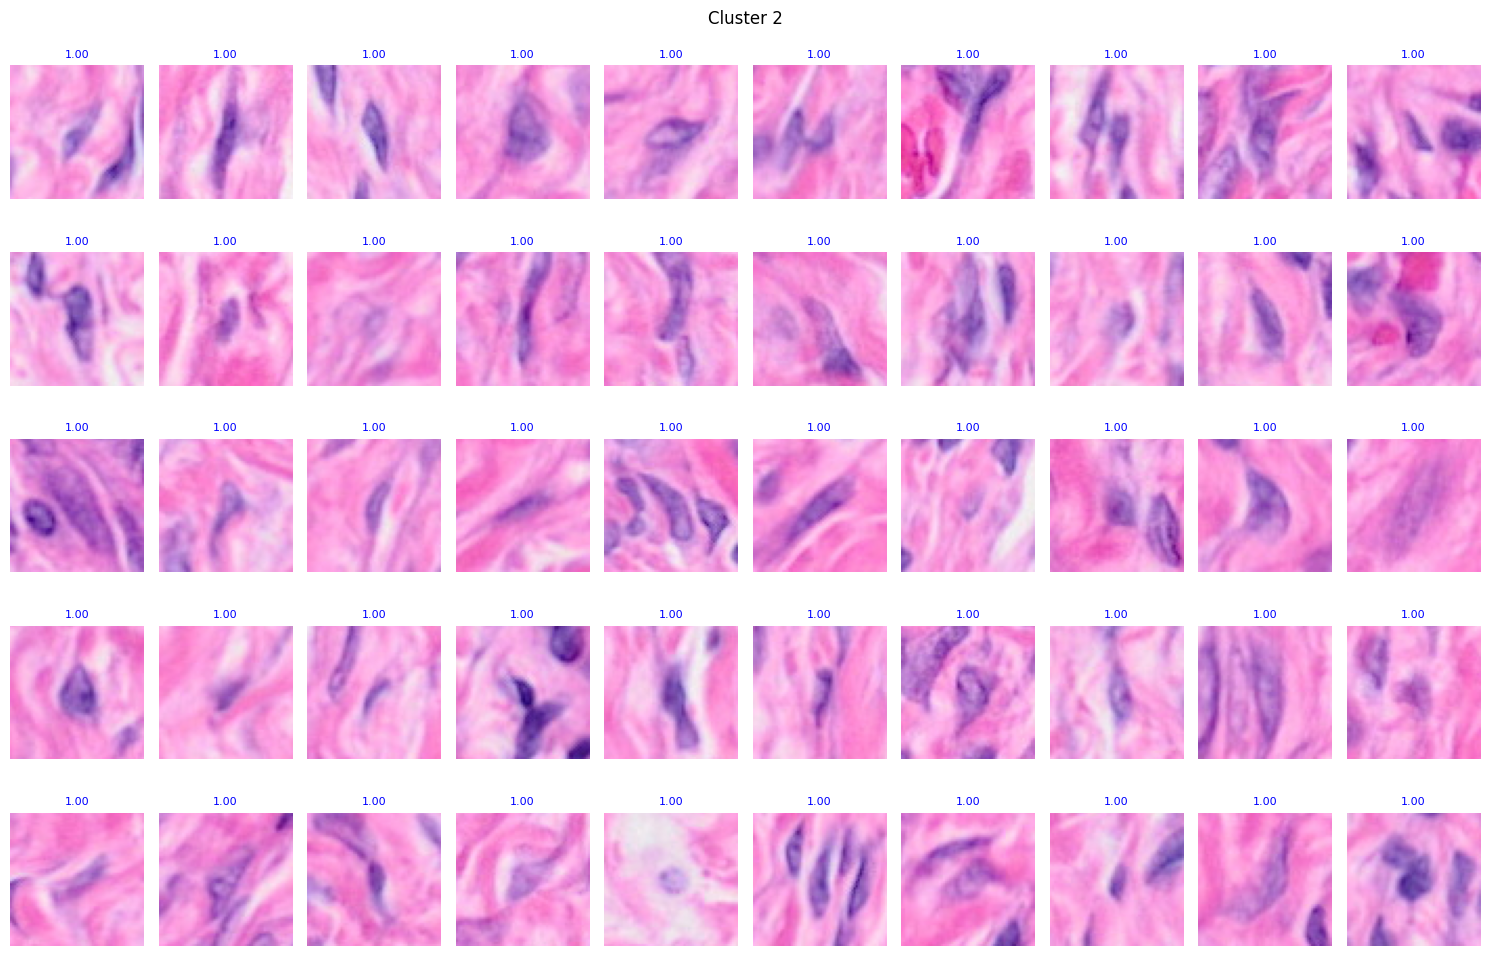

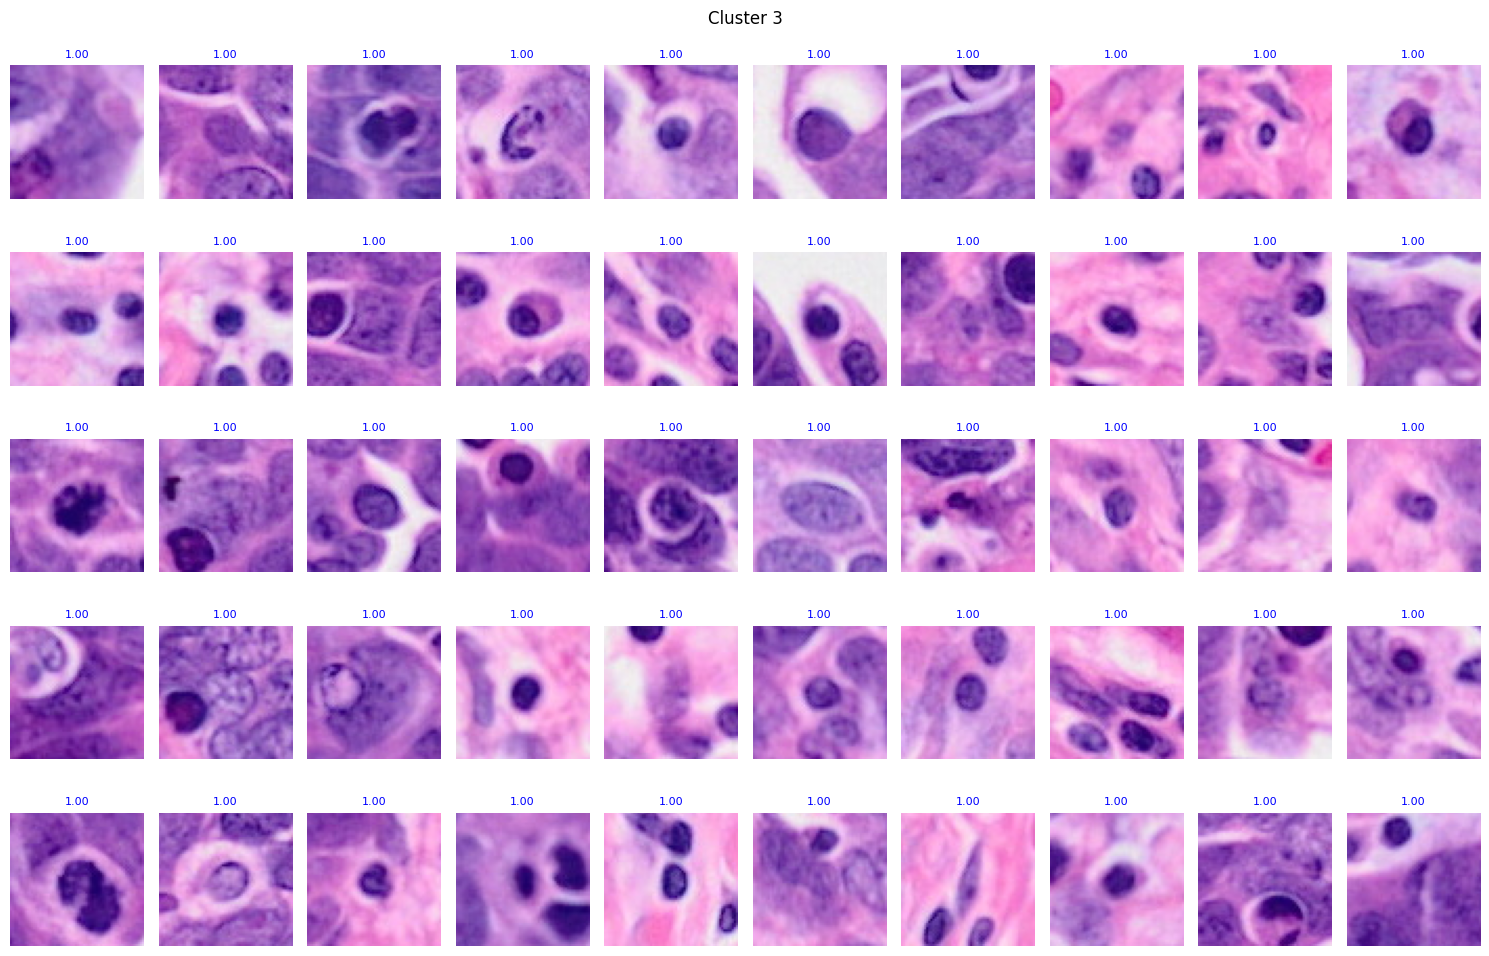

In [ ]:
from hedest.plots import plot_grid_celltype

for ct in ct_list:
    plot_grid_celltype(predictions=ground_truth, image_dict=image_dict, cell_type=ct, n=50, selection="random", display=True)